<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This project I got at analytics.vidhya as a Hackthon.**

Project Discription- As we are aware of the How the Artificial Intelligence becoming more and more usefull for the world.
Here I am predicting whether loan of person will get approved or not based on their profesional, financial and persoanl status. 
The detailed explanation of problem statement is right there- 

**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

The column name- 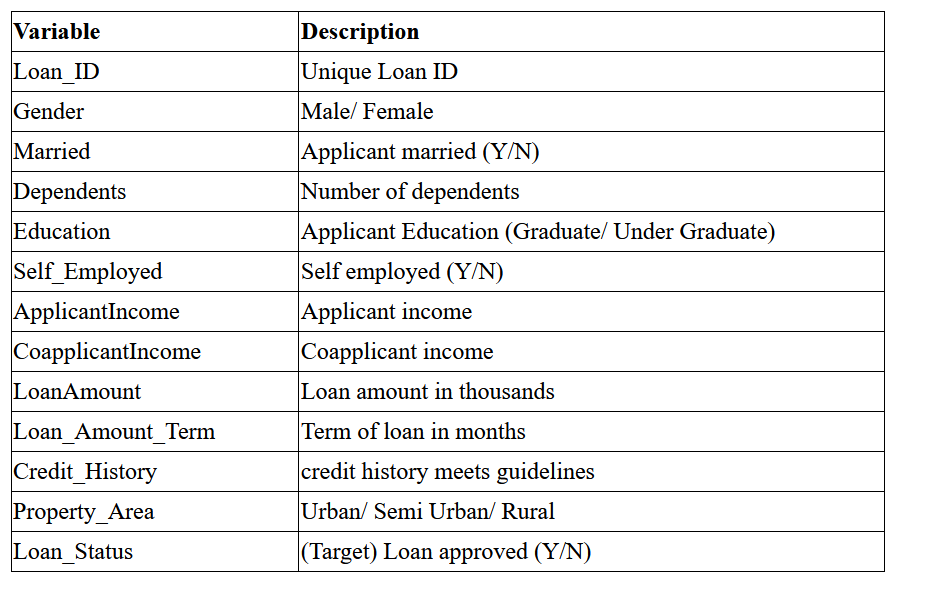




To Proceed In project, I first need to Import all the necessary python library.
I am importing here-\

NumPy- for making fast working process of array and It is also used for matrices, fourier transform, and liner alzebra. 
Pandas- For data manipulation and analysis

matplotlib.pyplot- For Data Visualization

seaborn for importing the random forest algorithms. 





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Lets First Upload the traing data on google colab, and check the first 5 rows of data. 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train_ctrUa4K.csv to train_ctrUa4K.csv


In [ ]:

import io
df = pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K.csv']))
print(df.head())

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


In [ ]:
newdf=pd.read_csv(io.BytesIO(uploaded['train_ctrUa4K.csv']))
print(newdf.head())

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


Lets First Upload the traing data on google colab, and check the first 5 rows of data. 

Ohh, its printing only 6 coulmns and others are Hidden, for better understanding of data we need to print all the columns.

There is a way by which we can control this-
 



In [ ]:
# This will create a wider space on which the printed thing should get show
desired_width=500

pd.set_option('display.width', desired_width)

#np.set_printoption(linewidth=desired_width)
#setting the number of columns need to be show 
pd.set_option('display.max_columns',40)

Now again print the data frame


In [ ]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0         Urban           Y
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.

Now let’s see all the Information of data like, how many missing values are there in each column and duplicated value and data type of each column.



In [ ]:
#lets check the shape of data 
print('the shape of data',df.shape)

#This line of code will tell the number of missing value on each columns and data type of each columns. 

print(df.info())

the shape of data (614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


As we can see in out put, all the columns do not contain 614 not null value that means there is misssing value.
Befor we try to remove the missing value lets first check whether any duplicated entry present in loan Id because If there is Duplicated loan Id thats means that whole would be dupliacted and we need to remove that row.

Now lets try to save the plot of matoplot.lib 

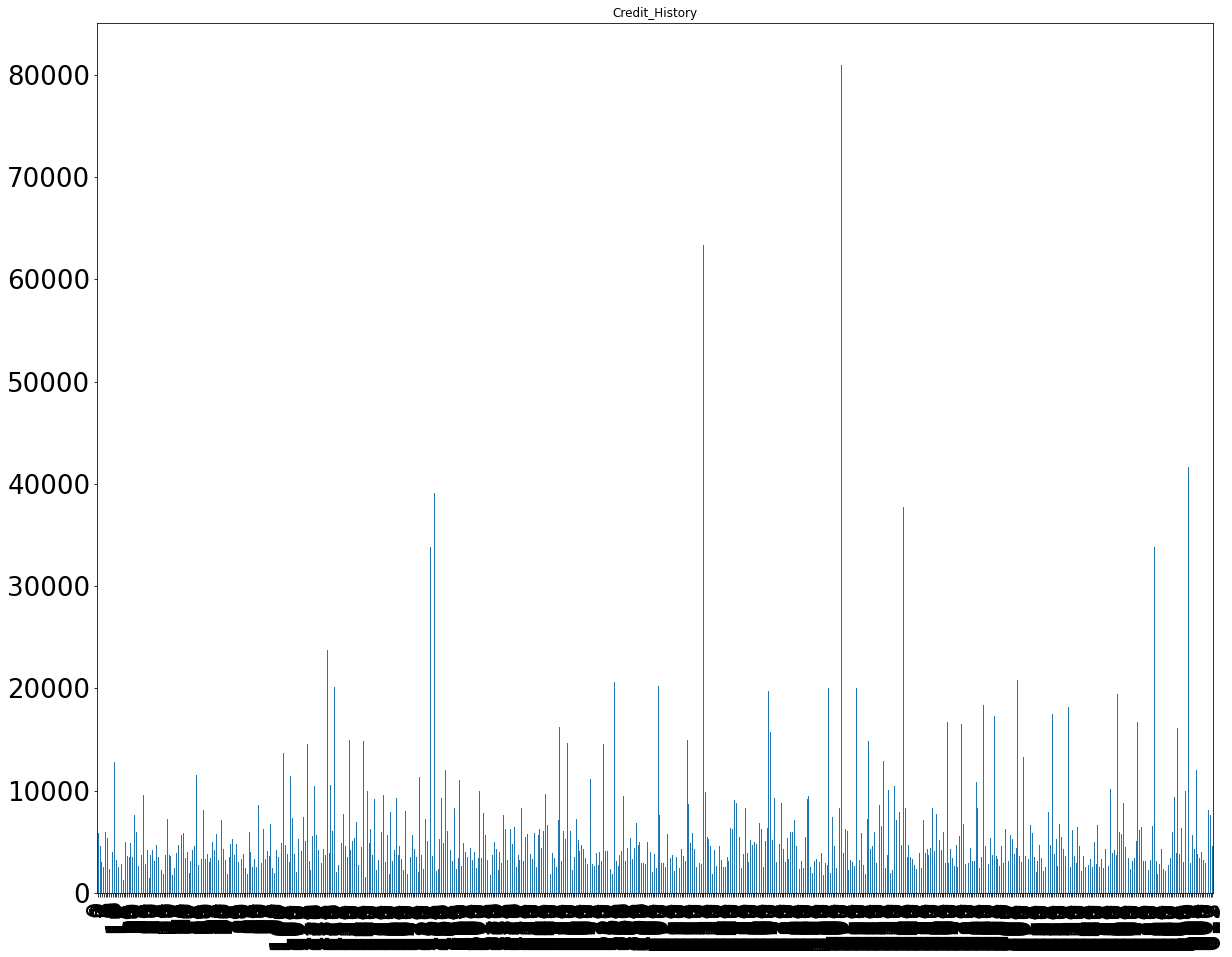

In [ ]:
a=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in a:

  fig = df[i].plot(kind='bar',  figsize=(20, 16), fontsize=26,title=i).get_figure()

  fig.savefig(i+'_bar.pdf')

Lets take a screenchot

In [ ]:
duplicate = df[df['Loan_ID'].duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


As we see there, it printed empty data frame that means these is no Duplictaed data present in loan_Id column, and not even a single missing value present in loan ID column so we do not need to drop any row.

Now let’s handle all missing value.
The columns- Dependents, self_eployed, Loan amount, loan amount term, credit histry, all these four columns have missing value.

As we knw there are several way avilable by which we can handle missing value but for here we will check our accyracy by two way-
1- just by dropping all the missing column
2- will fill the missing value by most freuenced, or mean value of that column depends on the type of the column. 

First- first try to build a model by dropping all the row which has even am single missing value.




In [ ]:
#This line of code delete all the row which would have even a single missing value 
wn=df.dropna()
# lets check the shape of data now
print('the shape of data before dropping the missing value',df.shape)
print('the shape of data after dropping missing column', wn.shape)
#lets once confirm that it might still contain some other type of null data
print(wn.info())


the shape of data before dropping the missing value (614, 13)
the shape of data after dropping missing column (480, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5

In [ ]:
now lets check the correlation between each column


In [ ]:
print(wn.corr())

                   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
ApplicantIncome           1.000000          -0.112588    0.495310         -0.010838       -0.056152
CoapplicantIncome        -0.112588           1.000000    0.190740         -0.005775       -0.008692
LoanAmount                0.495310           0.190740    1.000000          0.050867       -0.040773
Loan_Amount_Term         -0.010838          -0.005775    0.050867          1.000000        0.032937
Credit_History           -0.056152          -0.008692   -0.040773          0.032937        1.000000


As we see here that the max correlated value is Applicant Income and Loan amount

so, lets plot the regression plot between them.
and we also visualise which point representing yes oor which pointing no



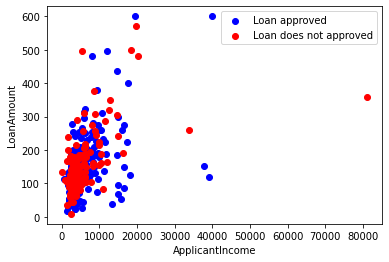

In [ ]:
x='ApplicantIncome'
y='LoanAmount'

plt.scatter(wn[wn['Loan_Status']=='Y'][x],wn[wn['Loan_Status']=='Y'][y], color='blue', label='Loan approved')
plt.scatter(wn[wn['Loan_Status']=='N'][x],wn[wn['Loan_Status']=='N'][y], color='red', label='Loan does not approved')

plt.xlabel(x)
plt.ylabel(y)
plt.legend()
plt.show()

according to the figure, It seems like there is high degree of correlation 

present here, the low value is comming only because of some outlier.

So, lets make different data frame which Applicant Income is less than 25000.00 
and then check the correlation between them.



the correltion between them                    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
ApplicantIncome           1.000000          -0.151633    0.592561          0.006505        0.048349
CoapplicantIncome        -0.151633           1.000000    0.214092         -0.008655       -0.015049
LoanAmount                0.592561           0.214092    1.000000          0.082199        0.000390
Loan_Amount_Term          0.006505          -0.008655    0.082199          1.000000        0.021471
Credit_History            0.048349          -0.015049    0.000390          0.021471        1.000000


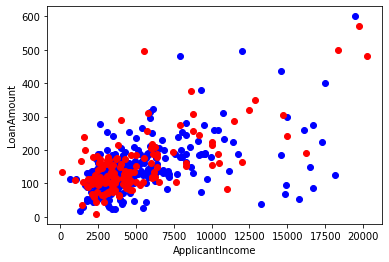

In [ ]:
nwn=wn[wn['ApplicantIncome']<25000]

print('the correltion between them',nwn.corr())
x='ApplicantIncome'
y='LoanAmount'
plt.scatter(nwn[nwn['Loan_Status']=='Y'][x],nwn[nwn['Loan_Status']=='Y'][y],marker='o', color='blue', label='Loan approved')
plt.scatter(nwn[nwn['Loan_Status']=='N'][x],nwn[nwn['Loan_Status']=='N'][y],marker='o', color='red', label='Loan does not approved')

plt.xlabel(x)
plt.ylabel(y)
plt.show()


Now we can check how the correlated value increased from 0.49 to 0.59, before we go to model building lets once we try to select which feature is best for random forest algorithms.


In [ ]:
print(wn.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.0             1.0         Urban           Y
5  LP001011   Male     Yes          2      Graduate           Yes             5417             4196.0       267.0             360.

In [ ]:
c=0
for i in wn[wn['Gender']=='Male']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the male whoose loan got approved',c)
print('the total number of man equal to the number of row in this daat set so data set shape',wn[wn['Gender']=='Male'].shape)
c=0
for i in wn[wn['Gender']=='Female']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the Female whoose loan got approved',c)
print('the total number of Female equal to the number of row in this daat set so data set shape',wn[wn['Gender']=='Female'].shape)

the male whoose loan got approved 278
the total number of man equal to the number of row in this daat set so data set shape (394, 13)
the Female whoose loan got approved 54
the total number of Female equal to the number of row in this daat set so data set shape (86, 13)


In [ ]:
c=0
x='Married'
for i in wn[wn[x]=='Yes']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the married whoose loan got approved',c)
print('the total number of married equal to the',wn[wn[x]=='Yes'].shape)
print('the percent of loan approvel',c*100/wn[wn[x]=='Yes'].shape[0])
c=0
for i in wn[wn[x]=='No']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the Married whoose loan got approved',c)
print('the total number of non Married equal to the ',wn[wn[x]=='No'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='No'].shape[0])

the married whoose loan got approved 227
the total number of married equal to the (311, 13)
the percent of loan approvel 72.9903536977492
the Married whoose loan got approved 105
the total number of non Married equal to the  169
the percent of loan approvel 62.1301775147929


married columns also seem like very important variable.
now let’s check for graduated columns.



In [ ]:
c=0
x='Education'
for i in wn[wn[x]=='Graduate']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the Graduate whoose loan got approved',c)
print('the total number of Graduate equal to the',wn[wn[x]=='Graduate'].shape)
print('the percent of loan approvel',c*100/wn[wn[x]=='Graduate'].shape[0])
c=0
for i in wn[wn[x]=='Not Graduate']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the not Graduate whoose loan got approved',c)
print('the total number of non Graduate equal to the ',wn[wn[x]=='Not Graduate'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='Not Graduate'].shape[0])

the Graduate whoose loan got approved 271
the total number of Graduate equal to the (383, 13)
the percent of loan approvel 70.75718015665797
the not Graduate whoose loan got approved 61
the total number of non Graduate equal to the  97
the percent of loan approvel 62.88659793814433


According to above calculation seem like if a person in greduated then he has heigher chance of getting approved loan.
now let’s see information about self-employed column



In [ ]:
c=0
x='Self_Employed'
for i in wn[wn[x]=='Yes']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the Self_Employed whoose loan got approved',c)
print('the total number of Self_Employed equal to the',wn[wn[x]=='Yes'].shape)
print('the percent of loan approvel',c*100/wn[wn[x]=='Yes'].shape[0])
c=0
for i in wn[wn[x]=='No']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the non Self_Employed whoose loan got approved',c)
print('the total number of non Self_Employed equal to the ',wn[wn[x]=='No'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='No'].shape[0])

the Self_Employed whoose loan got approved 43
the total number of Self_Employed equal to the (66, 13)
the percent of loan approvel 65.15151515151516
the non Self_Employed whoose loan got approved 289
the total number of non Self_Employed equal to the  414
the percent of loan approvel 69.80676328502416


here if person is not self employed so he has heigher chance of getting approved loan.

In [ ]:
wn.pivot(index=None,columns='Dependents')

Loan_ID                                Gender                   Married                    Education                               Self_Employed                 ... LoanAmount                     Loan_Amount_Term                      Credit_History                Property_Area                      Loan_Status               
Dependents         0         1         2        3+       0     1     2    3+       0    1    2   3+             0         1         2        3+             0    1    2   3+  ...          0      1      2    3+                0      1      2     3+              0    1    2   3+             0      1      2     3+           0    1    2   3+
1                NaN  LP001003       NaN       NaN     NaN  Male   NaN   NaN     NaN  Yes  NaN  NaN           NaN  Graduate       NaN       NaN           NaN   No  NaN  NaN  ...        NaN  128.0    NaN   NaN              NaN  360.0    NaN    NaN            NaN  1.0  NaN  NaN           NaN  Rural    NaN    NaN         NaN    N  NaN  NaN
2           LP001005       NaN       NaN       NaN    Male   NaN   NaN   NaN     Yes  NaN  NaN  NaN      Graduate       NaN       NaN       NaN           Yes  NaN  NaN  NaN  ...       66.0    NaN    NaN   NaN            360.0    NaN    NaN    NaN            1.0  NaN  NaN  NaN         Urban    NaN    NaN    NaN           Y  NaN  NaN  NaN
3           LP001006       NaN       NaN       NaN    Male   NaN   NaN   NaN     Yes  NaN  NaN  NaN  Not Graduate       NaN       NaN       NaN            No  NaN  NaN  NaN  ...      120.0    NaN    NaN   NaN            360.0    NaN    NaN    NaN            1.0  NaN  NaN  NaN         Urban    NaN    NaN    NaN           Y  NaN  NaN  NaN
4           LP001008       NaN       NaN       NaN    Male   NaN   NaN   NaN      No  NaN  NaN  NaN      Graduate       NaN       NaN       NaN            No  NaN  NaN  NaN  ...      141.0    NaN    NaN   NaN            360.0    NaN    NaN    NaN            1.0  NaN  NaN  NaN         Urban    NaN    NaN    NaN           Y  NaN  NaN  NaN
5                NaN       NaN  LP001011       NaN     NaN   NaN  Male   NaN     NaN  NaN  Yes  NaN           NaN       NaN  Graduate       NaN           NaN  NaN  Yes  NaN  ...        NaN    NaN  267.0   NaN              NaN    NaN  360.0    NaN            NaN  NaN  1.0  NaN           NaN    NaN  Urban    NaN         NaN  NaN    Y  NaN
..               ...       ...       ...       ...     ...   ...   ...   ...     ...  ...  ...  ...           ...       ...       ...       ...           ...  ...  ...  ...  ...        ...    ...    ...   ...              ...    ...    ...    ...            ...  ...  ...  ...           ...    ...    ...    ...         ...  ...  ...  ...
609         LP002978       NaN       NaN       NaN  Female   NaN   NaN   NaN      No  NaN  NaN  NaN      Graduate       NaN       NaN       NaN            No  NaN  NaN  NaN  ...       71.0    NaN    NaN   NaN            360.0    NaN    NaN    NaN            1.0  NaN  NaN  NaN         Rural    NaN    NaN    NaN           Y  NaN  NaN  NaN
610              NaN       NaN       NaN  LP002979     NaN   NaN   NaN  Male     NaN  NaN  NaN  Yes           NaN       NaN       NaN  Graduate           NaN  NaN  NaN   No  ...        NaN    NaN    NaN  40.0              NaN    NaN    NaN  180.0            NaN  NaN  NaN  1.0           NaN    NaN    NaN  Rural         NaN  NaN  NaN    Y
611              NaN  LP002983       NaN       NaN     NaN  Male   NaN   NaN     NaN  Yes  NaN  NaN           NaN  Graduate       NaN       NaN           NaN   No  NaN  NaN  ...        NaN  253.0    NaN   NaN              NaN  360.0    NaN    NaN            NaN  1.0  NaN  NaN           NaN  Urban    NaN    NaN         NaN    Y  NaN  NaN
612              NaN       NaN  LP002984       NaN     NaN   NaN  Male   NaN     NaN  NaN  Yes  NaN           NaN       NaN  Graduate       NaN           NaN  NaN   No  NaN  ...        NaN    NaN  187.0   NaN              NaN    NaN  360.0    NaN            NaN  NaN  1.0  NaN        

In [ ]:
wn.pivot_table(index = ['Dependents'], aggfunc ='size')

Dependents
0     274
1      80
2      85
3+     41
dtype: int64

In [ ]:
wn.pivot_table(index = ['Credit_History'],aggfunc ='size')

Credit_History
0.0     70
1.0    410
dtype: int64

now lets see the importenec of Dependents column


In [ ]:
c=0
x='Dependents'
for i in wn[wn[x]=='0']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents 0 whoose loan got approved',c)
print('the total number of dependents 0 equal to the',wn[wn[x]=='0'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='0'].shape[0])

c=0
x='Dependents'
for i in wn[wn[x]=='1']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents 1 whoose loan got approved',c)
print('the total number of dependents 1 equal to the',wn[wn[x]=='1'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='1'].shape[0])

c=0
x='Dependents'
for i in wn[wn[x]=='2']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents 2 whoose loan got approved',c)
print('the total number of dependents 2 equal to the',wn[wn[x]=='2'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='2'].shape[0])

c=0
x='Dependents'
for i in wn[wn[x]=='3+']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents 3 whoose loan got approved',c)
print('the total number of dependents 0 equal to the',wn[wn[x]=='3+'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='3+'].shape[0])


the dependents 0 whoose loan got approved 187
the total number of dependents 0 equal to the 274
the percent of loan approvel 68.24817518248175
the dependents 1 whoose loan got approved 52
the total number of dependents 1 equal to the 80
the percent of loan approvel 65.0
the dependents 2 whoose loan got approved 65
the total number of dependents 2 equal to the 85
the percent of loan approvel 76.47058823529412
the dependents 3 whoose loan got approved 28
the total number of dependents 0 equal to the 41
the percent of loan approvel 68.29268292682927


now lets see how importent is credit histry featuure.

In [ ]:
c=0
x='Credit_History'
for i in wn[wn[x]==1]['Loan_Status']:
  if i=='Y':
    c=c+1
print('the Self_Employed whoose loan got approved',c)
print('the total number of Self_Employed equal to the',wn[wn[x]==1].shape)
print('the percent of loan approvel',c*100/wn[wn[x]==1].shape[0])
c=0
for i in wn[wn[x]==0]['Loan_Status']:
  if i=='Y':
    c=c+1
print('the non Self_Employed whoose loan got approved',c)
print('the total number of non Self_Employed equal to the ',wn[wn[x]==0].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]==0].shape[0])

the Self_Employed whoose loan got approved 325
the total number of Self_Employed equal to the (410, 13)
the percent of loan approvel 79.26829268292683
the non Self_Employed whoose loan got approved 7
the total number of non Self_Employed equal to the  70
the percent of loan approvel 10.0


In [ ]:
c=0
x='Property_Area'
for i in wn[wn[x]=='Rural']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents Rural whoose loan got approved',c)
print('the total number of dependents rural equal to the',wn[wn[x]=='Rural'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='Rural'].shape[0])

c=0

for i in wn[wn[x]=='Urban']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents Urban whoose loan got approved',c)
print('the total number of dependents Urban equal to the',wn[wn[x]=='Urban'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='Urban'].shape[0])

c=0

for i in wn[wn[x]=='Semiurban']['Loan_Status']:
  if i=='Y':
    c=c+1
print('the dependents Semiurban whoose loan got approved',c)
print('the total number of dependents Semiurban equal to the',wn[wn[x]=='Semiurban'].shape[0])
print('the percent of loan approvel',c*100/wn[wn[x]=='Semiurban'].shape[0])


the dependents Rural whoose loan got approved 85
the total number of dependents rural equal to the 139
the percent of loan approvel 61.15107913669065
the dependents Urban whoose loan got approved 98
the total number of dependents Urban equal to the 150
the percent of loan approvel 65.33333333333333
the dependents Semiurban whoose loan got approved 149
the total number of dependents Semiurban equal to the 191
the percent of loan approvel 78.01047120418848


In [ ]:
print(wn.pivot_table(index = ['Property_Area'], aggfunc='size'))

Property_Area
Rural        139
Semiurban    191
Urban        150
dtype: int64


As we can see in image, there is only 10 percent chance of your loan getting approved if you have '0' credit_history.

after noticing this discrimination in male and female, it seem like that "Gender" feature is importent feature and we should take them as an explanetory variable.



As we can see here, we got increased the correlation from 0.49 to 0.59.

So, I got Idea, we can build a correlation model between them to predict the loan amount, but we will check this thing in later part when we would have need to increase the accuary of model.

For now, first lets build a random forest model, but the random forest model does not support the object type of data so for that we need to create dummy variable for that data.




In [ ]:

#now lets check the data frame now
#print(wn.head(20))


pdd=pd.get_dummies(wn['Gender'])

wn=pd.concat([wn, pdd['Male']],axis=1)
#the following line of code will drop all the column present in data
wn = wn.loc[:,~wn.columns.duplicated()]
print(wn.head())




    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Male
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N     1
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y     1
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y     1
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.0             1.0         Urban           Y     1
5  LP001011   Male     Yes          2      Graduate           Yes             5417             4196.

Now let’s create dummy variable for others also.
As we can see there are many columns for which we need to create dummy variale but we can make it viva for loop



In [ ]:
print(wn.info())
print(df.describe())
print(wn.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
 13  Male               480 non-null    uint8  
dtypes: float64(4), int64(1), object(8), uint8(1)
memory usage: 53.0+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAm

Now we need to create dummy variable for  ['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [ ]:
c=['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in c:

  pdd=pd.get_dummies(wn[i])

  wn=pd.concat([wn, pdd],axis=1)
print('wn.shape',wn.shape)
print(wn.head())

wn.shape (480, 27)
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Male  No  Yes  0  1  2  3+  Graduate  Not Graduate  No  Yes  Rural  Semiurban  Urban
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N     1   0    1  0  1  0   0         1             0   1    0      1          0      0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y     1   0    1  1  0  0   0         1             0   0    1      0          0      1
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y     1   0    1  1  0  0   0

As we can see here we got two column namead as '1Yes' to replace them we will assigne each column name a different column name


In [ ]:
print(wn['Yes'].head())
#pd.io.parsers.ParserBase({'names':df.columns})._maybe_dedup_names(df.columns)
print(wn['Yes'].head())
#this is for removing all the duplicate column
#wn = wn.loc[:,~wn.columns.duplicated()]
c=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Male', 'No', '1Yes', '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'No', '2Yes', 'Rural', 'Semiurban', 'Urban']
wn.columns=c
print(wn.head())
print(wn.columns)

   Yes  Yes
1    1    0
2    1    1
3    1    0
4    0    0
5    1    1
   Yes  Yes
1    1    0
2    1    1
3    1    0
4    0    0
5    1    1
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Male  No  1Yes  0  1  2  3+  Graduate  Not Graduate  No  2Yes  Rural  Semiurban  Urban
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N     1   0     1  0  1  0   0         1             0   1     0      1          0      0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y     1   0     1  1  0  0   0         1             0   0     1      0          0      1
3  LP001006   Male     Yes          0  Not Graduate            No     

Now we are all set for building a random forest model here, we just need to select the features by which we want to train.

In [ ]:

a=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Male', '1Yes', '0', '1', '2', 'Not Graduate', '2Yes', 'Rural', 'Semiurban']
b=['Loan_Status']
X=wn[a]
print(X.shape)
Y=wn[b]
print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=100)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('the accuracy',accuracy_score(y_test, y_pred))


(480, 13)
(480, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


the accuracy 0.7708333333333334


As we can see here that we are getting accuracy= 0.7708333333333334, now let’s try to increase that accuracy.
let’s try to change the feature this might leads us to increase the accuracy.

We have seen that the Applicant income and Loan amount heigher correlation, this might be causing multicolinearty in model lets remove Loan_amount and then check the accuracy.



In [ ]:
a=['ApplicantIncome','CoapplicantIncome', 'Loan_Amount_Term', 'Male', '1Yes', '0', '1', '2', 'Not Graduate', '2Yes', 'Rural', 'Semiurban']
b=['Loan_Status']
X=wn[a]
print(X.shape)
Y=wn[b]
print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=100)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('the accuracy',accuracy_score(y_test, y_pred))

(480, 12)
(480, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


the accuracy 0.6875


NO, This one decreses the accuracy , because Loan amount is very importen feature of model.

now we remove applican_Income from model and lets check the accuracy.

In [ ]:
a=['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Male', '1Yes', '0', '1', '2', 'Not Graduate', '2Yes', 'Rural', 'Semiurban']
b=['Loan_Status']
X=wn[a]
print(X.shape)
Y=wn[b]
print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=100)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('the accuracy',accuracy_score(y_test, y_pred))

(480, 12)
(480, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


the accuracy 0.7083333333333334


this one also seems pretty importene feature, because if we remove all the missing row.
let’s first check the how many missing column has missing value



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


missing value present in column name-
 ['Gender','Married','Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Two replace the approximate correct value there are several method avilable like- If column is categorical column then we can replace it by most frquent category, if its continious feature then we can replace it by mean value of that feature or either we can make a prediction model even predecting the missing value of the model.

we will try all the method one by one and will see how do we get the better accuracy.

First let’s try to fill all the categorical data by most frequent and all the cotinious feature by mean of the feature. 




In [ ]:

#replacing all the null value to the effective value
#replacing all the duplicated value with 'male' because we already know 'male' hasheigher frequency
df['Gender'] = df['Gender'].replace(np.nan, 'Male')
#replacing married null value with yes because null has heigher frequency
df['Married'] = df['Married'].replace(np.nan, 'Yes')
#replacing null dependeds with 0 because 0 has heigher frequency
df['Dependents'] = df['Dependents'].replace(np.nan, 0)
#replacing selfemployed to no
df['Self_Employed'] = df['Self_Employed'].replace(np.nan, 'No')
#replacing null loan amount to mean of loan amount
df['LoanAmount'] = df['LoanAmount'].replace(np.nan, df['LoanAmount'].mean())
#replacing loan amount term to most frequest one loan amount term which is 360.0
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan, 360.0)
df['Credit_History'] = df['Credit_History'].replace(np.nan, 1)
print('printing data information')

print(df.info())


printing data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Now we can see that after replacing missing value there is no more missing data so we build a random forest model here and can check the accuracy we get.

but we are also knowing the the random foreset algorithms does not support the object type coulumn, that is why we need to create the dummy variable of each column.


In [ ]:
c=['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
tdf=df
for i in c:

  pdd=pd.get_dummies(df[i])

  df=pd.concat([df, pdd],axis=1)
print('df.shape',df.shape)
print(df.head())

df.shape (614, 29)
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Female  Male  No  Yes  0  0  1  2  3+  Graduate  Not Graduate  No  Yes  Rural  Semiurban  Urban
0  LP001002   Male      No          0      Graduate            No             5849                0.0  146.412162             360.0             1.0         Urban           Y       0     1   1    0  0  1  0  0   0         1             0   1    0      0          0      1
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0  128.000000             360.0             1.0         Rural           N       0     1   0    1  0  0  1  0   0         1             0   1    0      1          0      0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0   66.000000             360.0             1.0         Urban       

As again we can say that there duplicated coulman name present in the data frame so we need to replace them.


In [ ]:
#lets print the column name for selecting all column name
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Female', 'Male', 'No', 'Yes', 0, '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'No', 'Yes', 'Rural', 'Semiurban', 'Urban'], dtype='object')


In [ ]:
# we are putting all column name accept the last 'Yes' column
cc=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Female', 'Male', 'No', '1Yes', 0, '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'No', '2Yes', 'Rural', 'Semiurban', 'Urban']
df.columns=cc

print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Female', 'Male', 'No', '1Yes', 0, '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'No', '2Yes', 'Rural', 'Semiurban', 'Urban'], dtype='object')


Now we are all set we just need to build a model so why wait, lets do it

In [ ]:
a=['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Male', '2Yes', '0', '1', '2', 'Not Graduate', '1Yes', 'Rural', 'Semiurban']
b=['Loan_Status']
X=df[a]
print(X.shape)
Y=df[b]
print(Y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,random_state=100)
clf = RandomForestClassifier(n_estimators=10000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('the accuracy',accuracy_score(y_test, y_pred))

(614, 13)
(614, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


the accuracy 0.6612903225806451


In [ ]:
print(newdf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0         Urban           Y
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y
3  LP001006   Male     Yes          0  Not Graduate            No             2583             2358.0       120.0             360.0             1.0         Urban           Y
4  LP001008   Male      No          0      Graduate            No             6000                0.0       141.0             360.

Just see, we are getting accuracy 0.66129    but when we removed all the duplcate row we got accuracy 0.77 that means we are getting less accuracy than previous data,




Now lets build a classifiaction model to predict the missing value of data

In [ ]:
print(newdf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Graduate  Not Graduate  Rural  Semiurban  Urban  N  Y
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N         1             0      1          0      0  1  0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
3  LP001006   Male     Yes          0  Not Graduate            No             2583  

Now lets check how many missing data are here.

In [ ]:
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Graduate           614 non-null    uint8  
 14  Not Graduate       614 non-null    uint8  
 15  Rural              614 non-null    uint8  
 16  Semiurban          614 non

Lets make a classifier which will predict the 'Gender' value, but for that we need to create binny  of that

In [ ]:
c=['Education','Property_Area','Loan_Status']

for i in c:

  pdd=pd.get_dummies(newdf[i])

  newdf=pd.concat([newdf, pdd],axis=1)
print('df.shape',newdf.shape)
print(newdf.head())





df.shape (614, 20)
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Graduate  Not Graduate  Rural  Semiurban  Urban  N  Y
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N         1             0      1          0      0  1  0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
3  LP001006   Male     Yes          0  Not Graduate            No

In [ ]:
newdfdf = newdf.loc[:,~newdf.columns.duplicated()]

print(newdf.head())
print(newdf.shape)

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area Loan_Status  Graduate  Not Graduate  Rural  Semiurban  Urban  N  Y
0  LP001002   Male      No          0      Graduate            No             5849                0.0         NaN             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
1  LP001003   Male     Yes          1      Graduate            No             4583             1508.0       128.0             360.0             1.0         Rural           N         1             0      1          0      0  1  0
2  LP001005   Male     Yes          0      Graduate           Yes             3000                0.0        66.0             360.0             1.0         Urban           Y         1             0      0          0      1  0  1
3  LP001006   Male     Yes          0  Not Graduate            No             2583  

Lets plot the histogram of categorical data and we will replace missing value according to that.


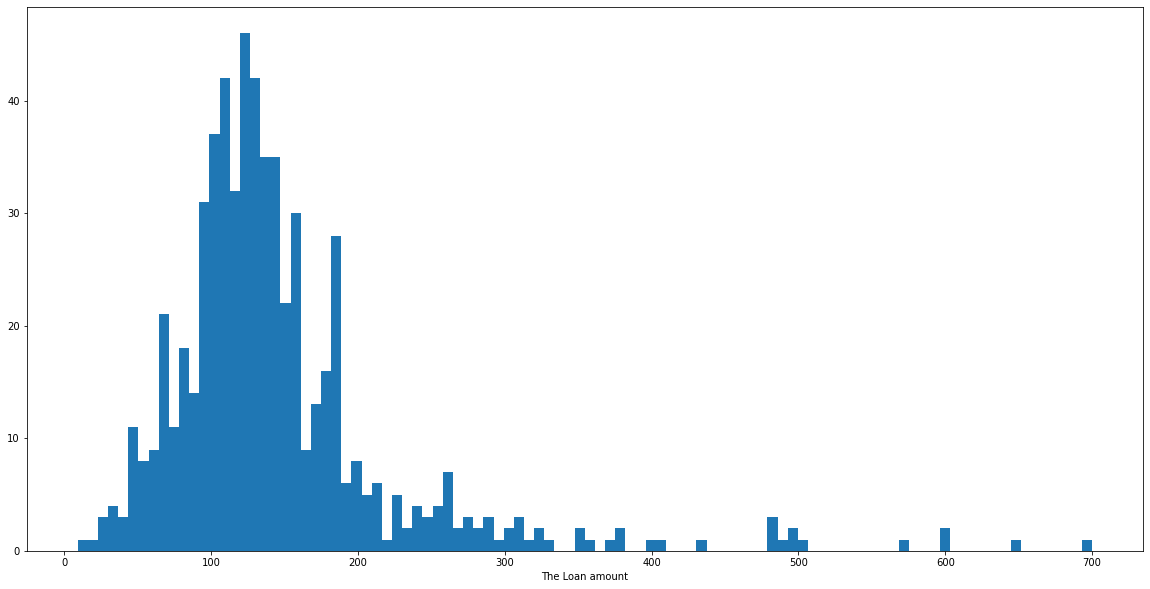

In [ ]:
plt.figure (figsize=(20,10))
plt.hist(df['LoanAmount'],100)

plt.xlabel('The Loan amount')
plt.show()

As we can see in figure that our most of data belong to less than 300 in loan column, so it is not a good idea to replace the missing data by whole data mean, we should only replace my mean of <=300. 

In [ ]:
newdf['LoanAmount'] = newdf['LoanAmount'].replace(np.nan, newdf[newdf['LoanAmount']<300]['LoanAmount'].mean())
print(newdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


Now lets plot our data and see how does it behave.

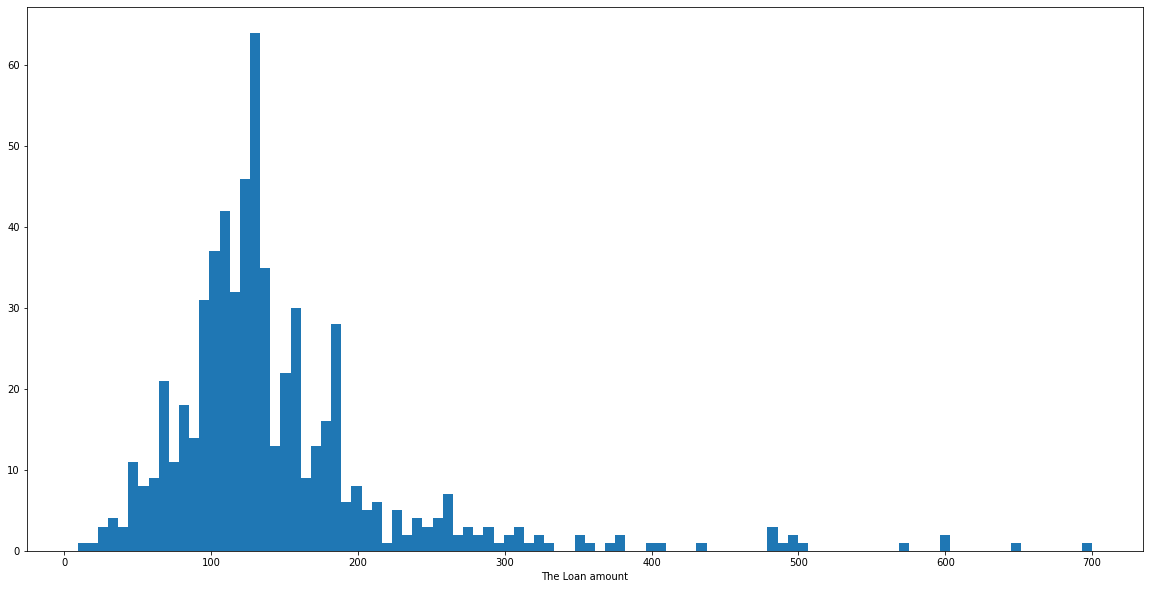

In [ ]:
plt.figure (figsize=(20,10))
plt.hist(newdf['LoanAmount'],100)

plt.xlabel('The Loan amount')
plt.show()

In [ ]:
print(newdf.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status', 'Graduate', 'Not Graduate', 'Rural', 'Semiurban', 'Urban', 'N', 'Y'], dtype='object')


Now lets apply KNN algorithms and see what accuaracy we get.

In [ ]:
X=newdf[['ApplicantIncome', 'CoapplicantIncome']]
y=newdf['Loan_Status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6 40]
 [10 67]]
              precision    recall  f1-score   support

           N       0.38      0.13      0.19        46
           Y       0.63      0.87      0.73        77

    accuracy                           0.59       123
   macro avg       0.50      0.50      0.46       123
weighted avg       0.53      0.59      0.53       123



lets plot the erro of the knn over different value of k

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

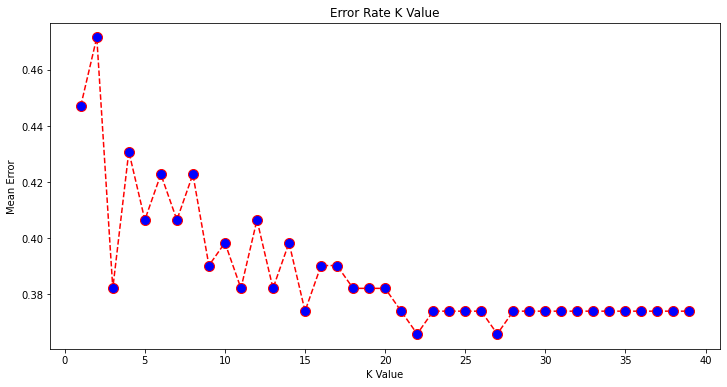

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

As we can in figure that the smallest error (0.25) when we choose nearest neighours=22

In [ ]:
#now lets check what accuracy we get when we choose k=22
classifier = KNeighborsClassifier(n_neighbors=22)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3 43]
 [ 2 75]]
              precision    recall  f1-score   support

           N       0.60      0.07      0.12        46
           Y       0.64      0.97      0.77        77

    accuracy                           0.63       123
   macro avg       0.62      0.52      0.44       123
weighted avg       0.62      0.63      0.53       123



I also have to submite the predicted file of test data at analytics vidhya, So lets import a train data and fit it on model and predict the final output 

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_lAUu6dG.csv to test_lAUu6dG (2).csv


In [ ]:
import io
testdf = pd.read_csv(io.BytesIO(uploaded['test_lAUu6dG.csv']))
print(testdf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area
0  LP001015   Male     Yes          0      Graduate            No             5720                  0       110.0             360.0             1.0         Urban
1  LP001022   Male     Yes          1      Graduate            No             3076               1500       126.0             360.0             1.0         Urban
2  LP001031   Male     Yes          2      Graduate            No             5000               1800       208.0             360.0             1.0         Urban
3  LP001035   Male     Yes          2      Graduate            No             2340               2546       100.0             360.0             NaN         Urban
4  LP001051   Male      No          0  Not Graduate            No             3276                  0        78.0             360.0             1.0         Urban


lets have a quick look on data set.

In [ ]:
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


We can see here that this test data has some missing value so first we have to deal with missing value, In case of train data set we just deleted all the data which contain even a single null value but here we can not do that thing 

lets visualise the loan amount data to see how it is located

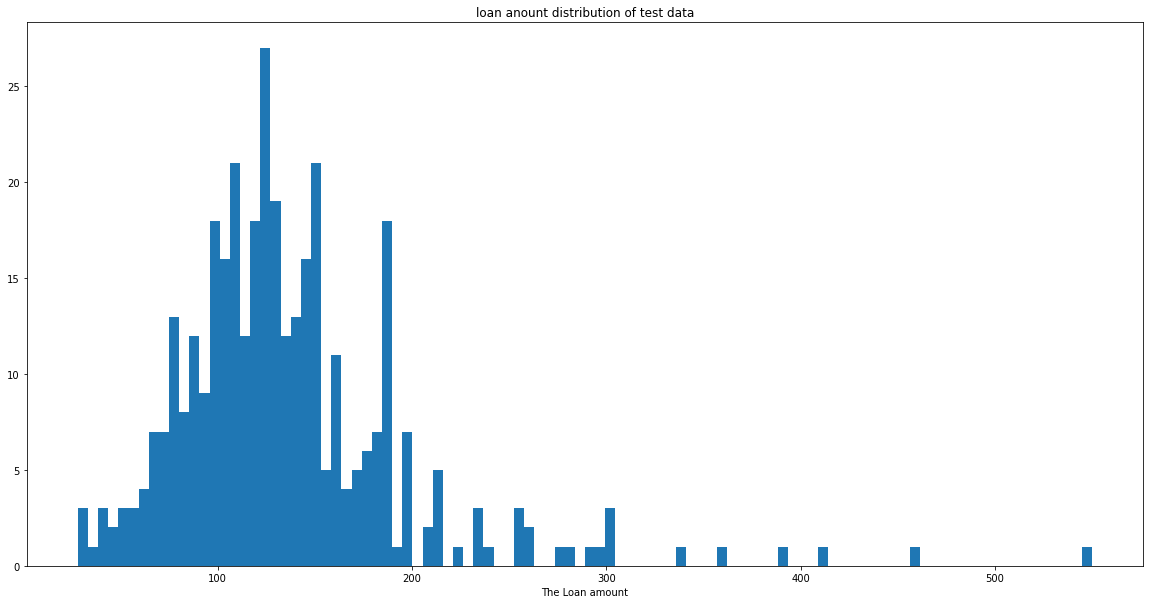

In [ ]:
plt.figure (figsize=(20,10))
plt.hist(testdf['LoanAmount'],100)
plt.title('loan anount distribution of test data')
plt.xlabel('The Loan amount')
plt.show()

here also we can see that the test data variation is skew-symmetric. so lets replace the missing value by the mean of less than 250

In [ ]:
testdf['LoanAmount']=testdf['LoanAmount'].replace(np.nan,testdf[testdf['LoanAmount']<250]['LoanAmount'].mean() )

In [ ]:
print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


lets again visualise the distribution of loanAmount column

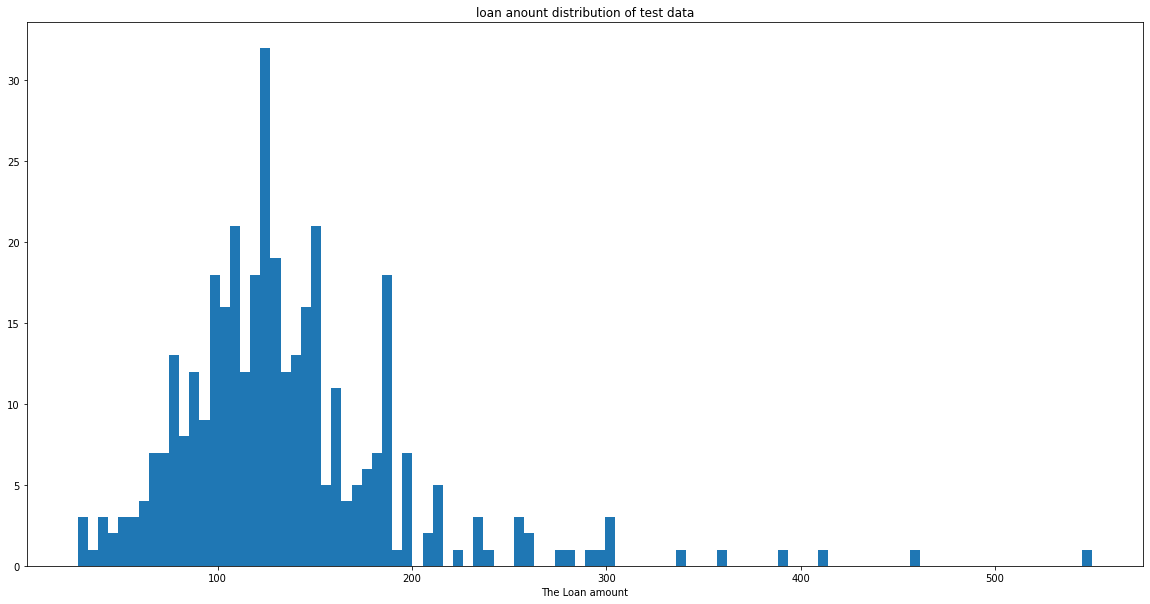

In [ ]:
plt.figure (figsize=(20,10))
plt.hist(testdf['LoanAmount'],100)
plt.title('loan anount distribution of test data')
plt.xlabel('The Loan amount')
plt.show()

lets generate the some dummy variable of column which has 'object' type data column, 

now lets worry about other column, if we looket other column so they are categorical variable, that means we should replace them by most frequent value to do that You can use df = df. fillna(df['Label']. value_counts(). index[0]) to fill NaNs with the most frequent value from one column

In [ ]:
testdf = testdf.fillna(testdf.mode().iloc[0])

print(testdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


lets create the dummy variable for ['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'] column.

In [ ]:


c=['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for i in c:

  pdd=pd.get_dummies(testdf[i])

  testdf=pd.concat([testdf, pdd],axis=1)


In [ ]:

#this is for removing all the duplicate column
testdf = testdf.loc[:,~testdf.columns.duplicated()]
pdd=pd.get_dummies(testdf["Self_Employed"])

testdf=pd.concat([testdf, pdd],axis=1)

print(testdf.head())
print(testdf.info())




    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area  No  Yes  0  1  2  3+  Graduate  Not Graduate  Rural  Semiurban  Urban  No  Yes
0  LP001015   Male     Yes          0      Graduate            No             5720                  0       110.0             360.0             1.0         Urban   0    1  1  0  0   0         1             0      0          0      1   1    0
1  LP001022   Male     Yes          1      Graduate            No             3076               1500       126.0             360.0             1.0         Urban   0    1  0  1  0   0         1             0      0          0      1   1    0
2  LP001031   Male     Yes          2      Graduate            No             5000               1800       208.0             360.0             1.0         Urban   0    1  0  0  1   0         1             0      0          0      1   1    0
3  LP001035   Male     Yes      

In [ ]:
#lets also get dummy variable for "gender column"
#this is for removing all the duplicate column

pdd=pd.get_dummies(testdf["Gender"])

testdf=pd.concat([testdf, pdd],axis=1)

print(testdf.head())
print(testdf.info())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area  No  Yes  0  1  2  3+  Graduate  Not Graduate  Rural  Semiurban  Urban  No  Yes  Female  Male
0  LP001015   Male     Yes          0      Graduate            No             5720                  0       110.0             360.0             1.0         Urban   0    1  1  0  0   0         1             0      0          0      1   1    0       0     1
1  LP001022   Male     Yes          1      Graduate            No             3076               1500       126.0             360.0             1.0         Urban   0    1  0  1  0   0         1             0      0          0      1   1    0       0     1
2  LP001031   Male     Yes          2      Graduate            No             5000               1800       208.0             360.0             1.0         Urban   0    1  0  0  1   0         1             0      0          0      1

In [ ]:
print(testdf.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'No', 'Yes', '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'Rural', 'Semiurban', 'Urban', 'No', 'Yes', 'Female', 'Male'], dtype='object')


In [ ]:
c=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'No', '1Yes', '0', '1', '2', '3+', 'Graduate', 'Not Graduate', 'Rural', 'Semiurban', 'Urban', 'No', '2Yes','Female', 'Male']
testdf.columns=c
print(testdf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History Property_Area  No  1Yes  0  1  2  3+  Graduate  Not Graduate  Rural  Semiurban  Urban  No  2Yes  Female  Male
0  LP001015   Male     Yes          0      Graduate            No             5720                  0       110.0             360.0             1.0         Urban   0     1  1  0  0   0         1             0      0          0      1   1     0       0     1
1  LP001022   Male     Yes          1      Graduate            No             3076               1500       126.0             360.0             1.0         Urban   0     1  0  1  0   0         1             0      0          0      1   1     0       0     1
2  LP001031   Male     Yes          2      Graduate            No             5000               1800       208.0             360.0             1.0         Urban   0     1  0  0  1   0         1             0      0          0

now lets try to predict the output by xgboost algorithms-
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks

In [ ]:
!pip install xgboost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
print(wn.info())
seed = 100
test_size = 0.050
print(wn.columns)
a=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
a=['Credit_History','ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Male', '1Yes', '0', '1', '2', 'Not Graduate', '2Yes', 'Rural', 'Semiurban']

b=['Loan_Status']
X=wn[a]
Y=wn[b]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier(n_estimators=50, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
 13  Male               480 non-null    uint8  
 14  No                 480 non-null    uint8  
 15  1Yes               480 non-null    uint8  
 16  0                  480 non

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As we can see nw that we are getting 95% accuracy so lets predict our final output from this model


In [ ]:
y_pred = model.predict(testdf[a])
testdf['Loan_Status']=y_pred
testdf[['Loan_ID','Loan_Status']].to_csv(r'the_one1.csv',index = None, header=True)
print('its done')

its done


In [ ]:
y_pred1 = model.predict(testdf[a])


Now we have predicted the ouput lets save it in our system.

In [ ]:
testdf['Loan_Status']=y_pred1
testdf[['Loan_ID','Loan_Status']].to_csv('the good one.csv')
print('the saving is done')

the saving is done


now lets train our xgboost model by data set where we replaced value with the most frquent value.

In [ ]:
X=df[a]
Y=df[b]
seed = 100
test_size = 0.050

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier(n_estimators=50, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

y_pred = model.predict(testdf[a])
testdf['Loan_Status']=y_pred
testdf[['Loan_ID','Loan_Status']].to_csv(r'the_one3.csv',index = None, header=True)
testdf['Loan_Status']=y_pred1
testdf[['Loan_ID','Loan_Status']].to_csv('the good one3.csv',index = None, header=True)
print('the saving is done')


Accuracy: 70.97%
the saving is done


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
